# Самостоятельный проект: «Стримчик»

## Описание проекта и данных

### Описание проекта

Работая в интернет-магазине «Стримчик», **нужно выявить определяющие успешность игры закономерности**, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на следующий год. 


Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. **Нужно отработать принцип работы с данными.** Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.


В наборе данных попадается аббревиатура *ESRB (Entertainment Software Rating Board)* — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Описание данных

1. **Name** — название игры;
2. **Platform** — платформа;
3. **Year_of_Release** — год выпуска;
4. **Genre** — жанр игры;
5. **NA_sales** — продажи в Северной Америке (миллионы проданных копий);
6. **EU_sales** — продажи в Европе (миллионы проданных копий);
7. **JP_sales** — продажи в Японии (миллионы проданных копий);
8. **Other_sales** — продажи в других странах (миллионы проданных копий);
9. **Critic_Score** — оценка критиков (максимум 100);
10. **User_Score** — оценка пользователей (максимум 10);
11. **Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию;

Данные за 2016 год могут быть неполными.

## Основной проект:

### Загрузка библиотек и просмотр данных

In [1]:
import numpy as np
import pandas as pd
import datetime 
from scipy import stats as st
import matplotlib.pyplot as plt
import calendar
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Get data
def get_info(df, name):
    print('\n', '*' * 20, '\n')
    print(f'Общая информация для таблицы {name} \n')
    df.info()
    display(df.head(5)) 
    print(f'\n Количество NaN values для таблицы {name}: \n', df.isnull().sum())
    print(f'\n Количество дубликатов для таблицы {name}:   ', df.duplicated().sum())
    print(f'\n Названия столбцов для таблицы {name}:'       , df.columns)

    print('Уникальные значения в столбце Name'    , df['Name'].unique()    , '\n')
    print('Уникальные значения в столбце Platform', np.sort(df['Platform'].unique()), '\n') 
    print('Уникальные значения в столбце Genre'   , df['Genre'].unique()   , '\n')
    print('Уникальные значения в столбце Rating'  , df['Rating'].unique()  , '\n')  
    
    print('\n', '*' * 20, '\n')
    
    
# Get data
df_games    = pd.read_csv('/datasets/games.csv', sep = ',')    

# Get common information about data
info_games  = get_info(df_games, 'Games')


 ******************** 

Общая информация для таблицы Games 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN



 Количество NaN values для таблицы Games: 
 Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

 Количество дубликатов для таблицы Games:    0

 Названия столбцов для таблицы Games: Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')
Уникальные значения в столбце Name ['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica'] 

Уникальные значения в столбце Platform ['2600' '3DO' '3DS' 'DC' 'DS' 'GB' 'GBA' 'GC' 'GEN' 'GG' 'N64' 'NES' 'NG'
 'PC' 'PCFX' 'PS' 'PS2' 'PS3' 'PS4' 'PSP' 'PSV' 'SAT' 'SCD' 'SNES' 'TG16'
 'WS' 'Wii' 'WiiU' 'X360' 'XB' 'XOne'] 

Уникальные

<font color='blue'>Предварительные выводы:</font>
1. Данные были успешно получены:
    1. В наличии у нас имеется 16715 позиций;
    2. Имена колонок указаны с большой буквы, надо изменить имена колонок и записать все колонки с маленькой буквы;
    3. В данных, а именно в столбцах **Name**, **Platform**, **Genre**, **Rating** для записи позиций используются разные регистры, нужно привести все к единому стилю;
    4. В столбцах **Name**, **Year_of_Release**, **Genre**, **Critic_Score**, **User_Score**, **Rating** есть пропуски. 
        1. Пропуски в колонке **Name** на основе имеюзихся данных не представляется возможным, поэтому эти две позиции будут удалены;
        2. Пропуски в колонках **Critic_Score** и **User_Score**: Данные рейтинги выставляются журналистами и игроками, соответственно если у игры нет рейтинга, можно предположить, что игра была практически не заметной для игрового сообщества.  Второе предположение, это были сборники малобюджетных игр, например 100 в 1, шде у каждой игр мог быть свой рейтинг, в результате чего определить рейтинг сборника не представляется возможным. Данные пропуски можно либо не заполнять, либо заменить пропуски на 0, что будет свидетельствовать об отсутствии какой-то реакции на данную игру со стороны игровых критиков. Но поскольку эти столбцы нужны для оценки корреляции и статистических тестов наличие в данных нулей может привести к искажениям, так что оставлю пропуски без изменений. Скорее всего такие игры будут малобюджетными и их продажи будут малозначительными. 
        3. Пропуски в колонке **Rating** оставлю пустыми - если посмотреть в интернете на основе чего формируется данный [рейтинг][1], то можно сделать вывод - нашей информации явно недостаточно. Даже разбитие на группы в зависимости от имени платформы и прочего не даст нужного эффекта;    
        4. Пропуски в колонке **release_year** - имея только текущую информации не предоставляется возможным. Удалю данные строки      
   5. Нужно изменить формат колонок:
       1. Year_of_Release из *float64* в *int*;
   6. Пока что, явных дубликатов выявить не удалось, но скорее всего есть неявные дубликаты.
  
  
[1]:https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board

### Предобработка данных

In [3]:
# Rename columns
df_games = df_games.rename(columns = {'Name'            : 'name'        ,
                                      'Platform'        : 'platform'    ,
                                      'Year_of_Release' : 'release_year',
                                      'Genre'           : 'genre'       , 
                                      'NA_sales'        : 'na_sales'    ,
                                      'EU_sales'        : 'eu_sales'    ,
                                      'JP_sales'        : 'jp_sales'    ,
                                      'Other_sales'     : 'w_sales'     ,
                                      'Critic_Score'    : 'critic_score',
                                      'User_Score'      : 'user_score'  ,
                                      'Rating'          : 'rating'      })



# Change register
col_list = ['name', 'platform', 'genre', 'rating']
for col in col_list:
    df_games[col] = df_games[col].str.lower()

# Delete rows with NaN values in name column
df_games = df_games.loc[(~df_games['name'].isna() & ~df_games['release_year'].isna())]


# Change format
df_games['release_year'] = df_games['release_year'].astype('int64')
df_games['critic_score'] = df_games['critic_score'].astype('Int64')

Сделаю промежуточную проверку 

In [4]:
display(df_games.head(15))

print('NaN values \n', df_games.isnull().sum())

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,w_sales,critic_score,user_score,rating
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76,8,e
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82,8.3,e
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80,8,e
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,89,8.5,e
7,wii play,wii,2006,misc,13.96,9.18,2.93,2.84,58,6.6,e
8,new super mario bros. wii,wii,2009,platform,14.44,6.94,4.70,2.24,87,8.4,e
9,duck hunt,nes,1984,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


NaN values 
 name               0
platform           0
release_year       0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
w_sales            0
critic_score    8461
user_score      6605
rating          6676
dtype: int64


Дополнительно, для проверки предположения, что заменить в столбце **rating** пропуски на что-то будет весьма проблематично, воспользуюсь методом loc и более подробно посмотрю на данные, например жанр *shooter* = 18+. Выполню более детальный анализ этих данных.

In [5]:
for group_age in df_games['genre'].unique():
    median_value = df_games.loc[df_games['genre'] == group_age, 'rating' ].unique()
    print(group_age, median_value)

sports ['e' nan 'e10+' 't' 'm']
platform [nan 'e' 'e10+' 't' 'm']
racing ['e' nan 't' 'e10+' 'm']
role-playing [nan 't' 'm' 'e' 'e10+']
puzzle [nan 'e' 'e10+' 't']
misc ['e' 'e10+' nan 't' 'k-a' 'm' 'ec']
shooter [nan 'm' 't' 'e10+' 'e']
simulation [nan 'e' 't' 'e10+' 'm']
action ['m' nan 'e' 't' 'e10+' 'ao' 'ec']
fighting ['t' nan 'm' 'e10+' 'e']
adventure [nan 'm' 'e' 't' 'e10+' 'ec']
strategy [nan 't' 'k-a' 'e' 'e10+' 'm' 'rp']


В результате видно, что даже такие жанры, как *shooter*, *action* и *fighting* обладают целым набором возврастных рейтингов, что и не позволит нам заполнить соответствующими значениями. 

### Рейтинг tbd

Дополнительно можно заменить, что столбец **user_score** имеет тип данных **object**, хотя в данном столбце должны быть оценки от пользователей, посмотрю что не так с данным столбцом.

In [6]:
print(df_games['user_score'].unique())

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


В данных есть пропуски и загодное значение tbd. Поскольку в задании сказано обратить повышенное внимание на данный пункт посмотрю эти данные более подробно.

In [7]:
df_users_score = df_games.query('user_score == "tbd"')
df_users_score

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,w_sales,critic_score,user_score,rating
119,zumba fitness,wii,2010,sports,3.45,2.59,0.0,0.66,NaN,tbd,e
301,namco museum: 50th anniversary,ps2,2005,misc,2.08,1.35,0.0,0.54,61,tbd,e10+
520,zumba fitness 2,wii,2011,sports,1.51,1.03,0.0,0.27,NaN,tbd,t
645,udraw studio,wii,2010,misc,1.65,0.57,0.0,0.20,71,tbd,e
718,just dance kids,wii,2010,misc,1.52,0.54,0.0,0.18,NaN,tbd,e
...,...,...,...,...,...,...,...,...,...,...,...
16695,planet monsters,gba,2001,action,0.01,0.00,0.0,0.00,67,tbd,e
16697,bust-a-move 3000,gc,2003,puzzle,0.01,0.00,0.0,0.00,53,tbd,e
16698,mega brain boost,ds,2008,puzzle,0.01,0.00,0.0,0.00,48,tbd,e
16704,plushees,ds,2008,simulation,0.01,0.00,0.0,0.00,NaN,tbd,e


В результате удалось узнать, что есть 2376 строк, где встречается данный показатель. Воспользовавшись поиском данной аббривиатуры в интернете, мне удалось узнать, что tbd можно расшифровать как to be disscused или ждет обсуждения. Также мне удалось найти, что на [метакритике][1], данный рейтинг присваивается играм, фильмам, альбомам и т.д., в том случае, если полученных отзывов (оценок) меньше 3. Тоесть по сути, можно заменить данные значения на NaN, изменив при этом формат столбца на вещественный.

[1]:https://www.metacritic.com/faq

In [8]:
df_games['user_score'] = df_games['user_score'].replace('tbd', np.nan).astype('float64')

Как итог первых преобразований: 
1. Колонки были переименованны с учетом регистра;
2. Регистр в колонках был изменен
3. Строчки с пропусками в колонке **name** были удалены, дополнительно удалось избавится от пропусков в колонке **gerne**;
4. Пропуски в колонках **critic_score**, **user_score**, **rating** оставлены без изменений
5. Значения **tbd** из колонки **user_score** заменены на пропуски, поскольку из собранной информации, мне удалось узнать, что у таких игр, отзывов меньше 4, а следовательно нет объективной оценки.

### Поиска грубых ошибок в данных

Преждем чем приступить к расчету, суммарных объемов продаж, хочу более детально посмотреть на количественные данные и убедится что в данных нет, грубых ошибок, которые могут быть легко определены.

In [9]:
def histogram(df, col, bin):
    df.plot(y = col      , title = col,
            kind = 'hist', bins  = bin,
            grid = True  )

def boxplots(df, col):
    df.plot(y = col     , title = col, 
            kind = 'box', grid = True)  

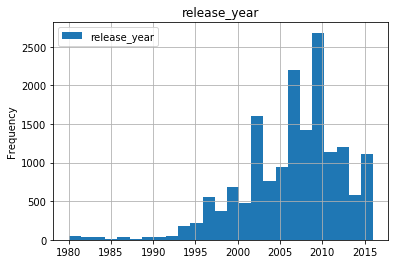

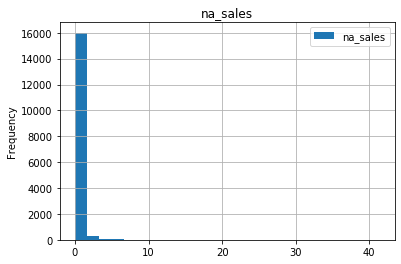

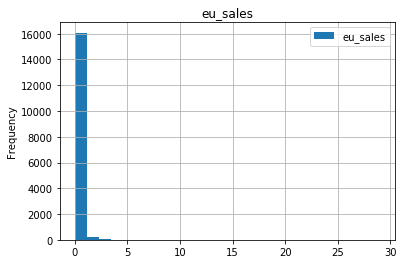

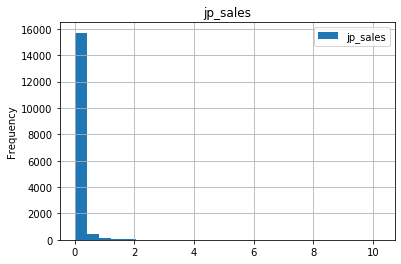

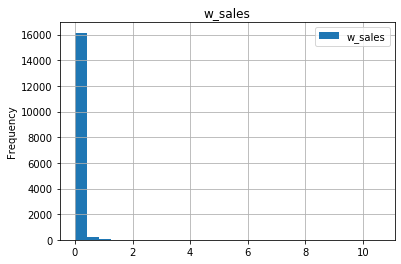

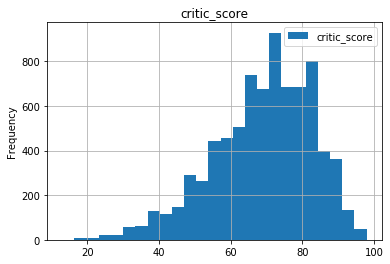

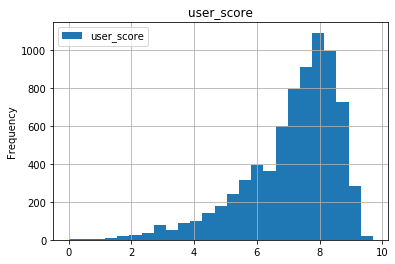

In [10]:
col_list = ['release_year', 'na_sales', 'eu_sales', 'jp_sales', 'w_sales', 'critic_score', 'user_score']

for col in col_list:
    plot = histogram(df_games, col, 25)

In [11]:
pd.set_option('display.precision', 2)
stat = df_games.describe()
display(f'Описательная статистика: \n', stat)

'Описательная статистика: \n'

,release_year,na_sales,eu_sales,jp_sales,w_sales,critic_score,user_score
count,16444.00,16444.00,16444.00,16444.00,16444.00,7983.00,7463.00
mean,2006.49,0.26,0.15,0.08,0.05,68.99,7.13
std,5.88,0.82,0.51,0.31,0.19,13.92,1.50
min,1980.00,0.00,0.00,0.00,0.00,13.00,0.00
25%,2003.00,0.00,0.00,0.00,0.00,60.00,6.40
50%,2007.00,0.08,0.02,0.00,0.01,71.00,7.50
75%,2010.00,0.24,0.11,0.04,0.03,79.00,8.20
max,2016.00,41.36,28.96,10.22,10.57,98.00,9.70


На первый взгляд с данными все в порядке и грубые ошибки отсутствуют, кроме того из графиков видно:
1. Что больше всего игр было издано в период с 2002 по 2009 год --> что скорее всего связано с появлением новых игровых платформ.
2. Большинство игр не продаются тиражом более 1 миллиона копий. Тенденция общая для всех стран.
3. В среднем критики оценивают большинство игр на 71 и более баллов, в то время как игроки оцениваю игры чуточку мягче, присуждая им рейтинг 7.5.

### Суммарный объем продаж

In [12]:
#def total_income(row):
#    na_sales = row['na_sales']
#    eu_sales = row['eu_sales']
#    jp_sales = row['jp_sales']
#    w_sales  = row['w_sales']
    
#    income = na_sales + eu_sales + jp_sales + w_sales
#    return income
 
# Get total income
#df_games['total_sales'] = df_games.apply(total_income, axis = 1)

df_games['total_sales'] = df_games[['na_sales','eu_sales','jp_sales', 'w_sales']].sum(axis = 1)
df_games

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,w_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


Вывод: Столбец с общим объемом продаж добавлен к нашей таблице. Пока предположение о том, что малобюджетные игры не способны привлечь к себе внимание критиков и игроков, косвенно находит подтверждение в полученных данных.

## Исследовательский анализ данных

### Сколько и когда выпускалось игр?

In [13]:
df_sell = df_games.groupby(['release_year']).agg({'total_sales' : ['count', 'sum', 'mean']})

# Rename columns
df_sell.columns = ['released_games', 'total_sales', 'mean_sales']
df_sell

,released_games,total_sales,mean_sales
release_year,,,
1980,9,11.38,1.26
1981,46,35.68,0.78
1982,36,28.88,0.80
1983,17,16.80,0.99
1984,14,50.35,3.60
1985,14,53.95,3.85
1986,21,37.08,1.77
1987,16,21.70,1.36
1988,15,47.21,3.15


In [14]:
def plot2data(df, col, title, y_label, lsales = False):
    
    fig = plt.figure(figsize = (14,10))
    ax  = fig.add_subplot(111)   
    
    if lsales == False:
        # Create plots
        ax.bar(df.index  , df[col], color = 'blue' )
        ax.plot(df.index , df[col], color = 'red', linewidth = 3.0)
    else:
        # Create plots
        ax.bar(df.index  , df[col], color = 'blue' )        
 
    # Set labels
    ax.set_title(title, fontsize = 14, pad = 20 )
    # Set y label
    ax.set_ylabel(y_label, color = 'black', fontsize = 14, labelpad = 20)
 
    if lsales == False:
        # Set y-axis and x-axis limits
        if col == 'released_games':
            ax.set_yticks(np.arange(0, 1501, 250))
        else:
            ax.set_yticks(np.arange(0, 750, 50))        
        
        ax.set_xticks(np.arange(1980, 2021, 5))
        
        # Set labels and fonts
        for label in ax.xaxis.get_ticklabels():
            label.set_color('black')
            label.set_rotation(0)
            label.set_fontsize(14)   
            
    else:
        # Set y-axis and x-axis limits
        ax.set_yticks(np.arange(0, 1251, 250)) 
        # Set labels parameters
        for label in ax.xaxis.get_ticklabels():
            label.set_color('black')
            label.set_rotation(90)
            label.set_fontsize(14)   
             
    # Get grid
    ax.grid(True , which = 'major', color = 'k', linestyle = 'solid', alpha = 0.5)

    # Common parameters for y values
    for label in ax.yaxis.get_ticklabels():
        label.set_color('black')
        label.set_rotation(0)
        label.set_fontsize(14)
    plt.show()

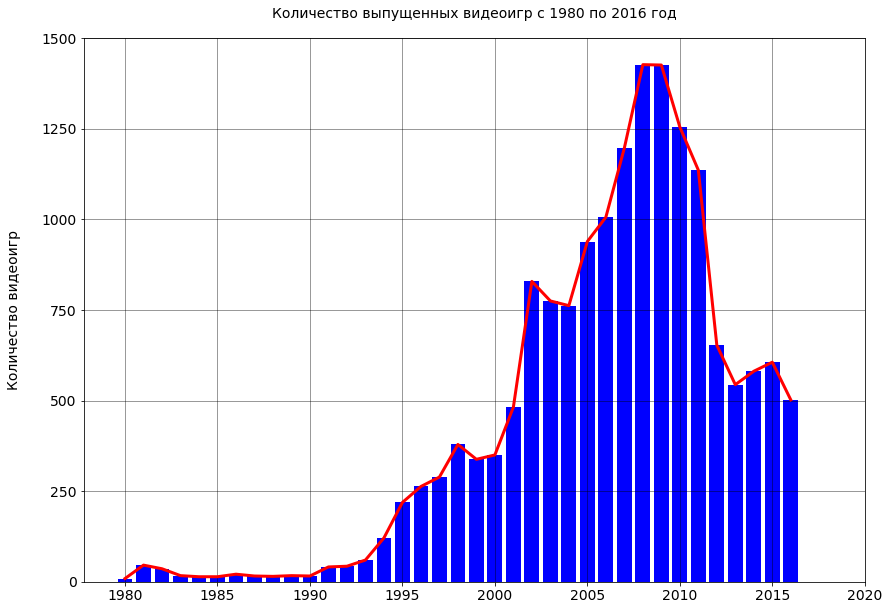

In [15]:
# Get plot for released_games 
plot2 = plot2data(df_sell                                            , 
                  'released_games'                                   , 
                  'Количество выпущенных видеоигр с 1980 по 2016 год', 
                  'Количество видеоигр'                              )

Вывод: Больше всего компьютерных игр было выпущено в период с 2008 по 2009 год. В этот период выпускалось по 1427 и 1426 игр. После чего начался спад по произодству компьютерных игр.

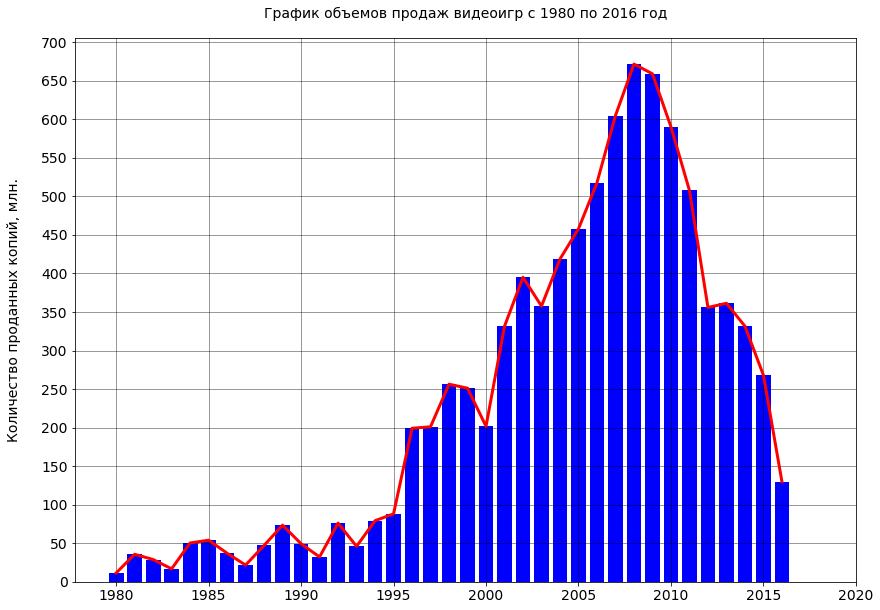

In [16]:
# Get plot for total sales for games
plot2 = plot2data(df_sell                                            ,
                  'total_sales'                                      , 
                  'График объемов продаж видеоигр с 1980 по 2016 год',
                  'Количество проданных копий, млн.'                 )

Вывод: График продаж компьютерных игр, также хорошо согласуется с графиком выпуска компьютерных игр. Легко заметить, что больше всего компьютерных игр было продано за период с 2007 по 2010 год. Кроме того, два графика позволяют выявить некий переломный момент в динамике развития компьютерных игр. Так с начала 1980 года и до 2009 года наблюдалась тенденция на увеличение выпуска компьютерных игр и соответсвенно объемы продаж также увеличивались. Начиная с 2009 год и 2016 года тенденция сменилась на уменьшение и количество выпушенных игр в 2016 году достигло уровня 2000 года, но при этом количество проданных копий опустилось до отметки 1995 года. Исходя только из этих двух графиков, можно сказать, что в индустрии компьютерных игр на данный момент наблюдается кризис. 

### Продажи разных платформ

Определим платформы с наибольшим уровнем продаж

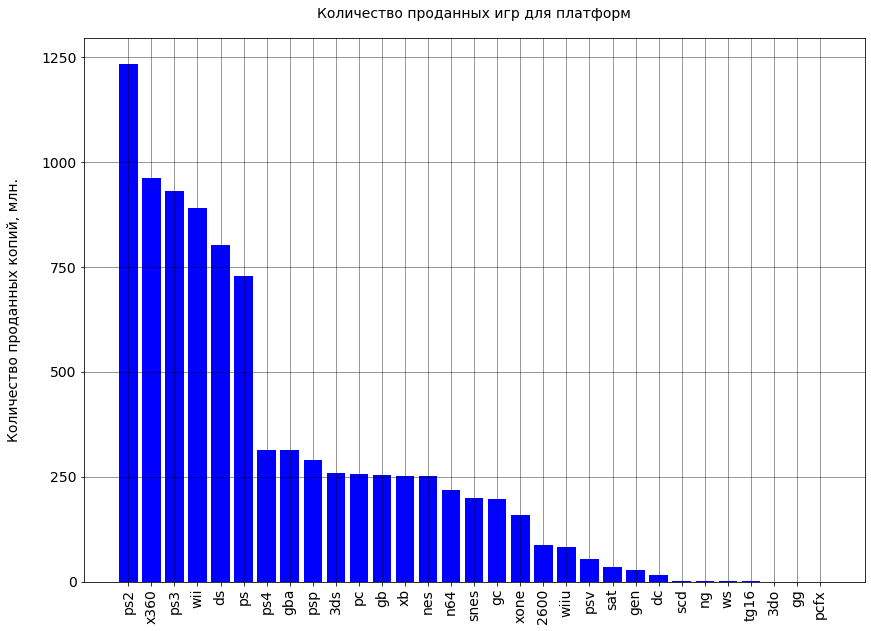

In [17]:
# Get data for platforms
top_platform = df_games.groupby(['platform']).agg({'total_sales' : ['count', 'sum']})
top_platform.columns = ['total_games','total_sales']
top_platform = top_platform.sort_values('total_sales', ascending = False)

# Get common plot for total sales -> platforms
plot2 = plot2data(top_platform                            , 
                  'total_sales'                           , 
                  'Количество проданных игр для платформ' ,
                  'Количество проданных копий, млн.'      , 
                  lsales = True                           )

Вывод: Из данного графика видно, что больше всего игр было продано на платформы: PS2, x360, PS3, WII, DS и PS. При этом платформа PS2 является явным лидером по количеству проданных игр за все время жизни приставки.

### Срок жизни игровой платформы

Для того чтобы ответить на вопрос: сколько в среднем живут игровые платформы, я построю гистограммы распределения продаж для игровых платформ, с наибольшим количеством выпущенных для них игр. Анализировать платформы, которых было выпушено меньше 10 игр, не имеет никакого смысла, скорее всего они все были выпущены водин год и просуществовали совсем недолго.

In [18]:
df_sell_platform = df_games.groupby(['platform', 'release_year']).agg({'total_sales' : ['count', 'sum', 'mean']})

# Rename columns
df_sell_platform.columns = ['released_games', 'total_sales', 'mean_sales']
df_sell_platform

released_games  total_sales  mean_sales
platform release_year                                         
2600     1980                       9        11.38        1.26
         1981                      46        35.68        0.78
         1982                      36        28.88        0.80
         1983                      11         5.84        0.53
         1984                       1         0.27        0.27
...                               ...          ...         ...
xb       2008                       1         0.18        0.18
xone     2013                      19        18.96        1.00
         2014                      61        54.07        0.89
         2015                      80        60.14        0.75
         2016                      87        26.15        0.30

[238 rows x 3 columns]

In [19]:
def plot_data(df, title, y_label):
    
    fig = plt.figure(figsize = (14,10))
    ax  = fig.add_subplot(111)   
    
    # Create plots
    df.plot(ax = ax)
      
    # Set y-axis and x-axis limits
    ax.set_yticks(np.arange(0, 501, 50))
    
    # Set labels
    ax.set_title(title, fontsize = 14, pad = 20 )
    # Set y label
    ax.set_ylabel(y_label, color = 'black', fontsize = 14, labelpad = 20)
    # Set x label
    ax.set_xlabel('Год выпуска игры', color = 'black', fontsize = 14, labelpad = 20)
    
    # Get grid
    ax.grid(True , which = 'major', color = 'k', linestyle = 'solid', alpha = 0.5)

    for label in ax.xaxis.get_ticklabels():
        label.set_color('black')
        label.set_rotation(0)
        label.set_fontsize(14)
        
    for label in ax.yaxis.get_ticklabels():
        label.set_color('black')
        label.set_rotation(0)
        label.set_fontsize(14)
    plt.show()



Также следует отметить, что наибольший интерес для нас представляют игровые платформы, которые являются активными на данный момент, поскольку именно для таких платформ, сейчас и выпускают игры.

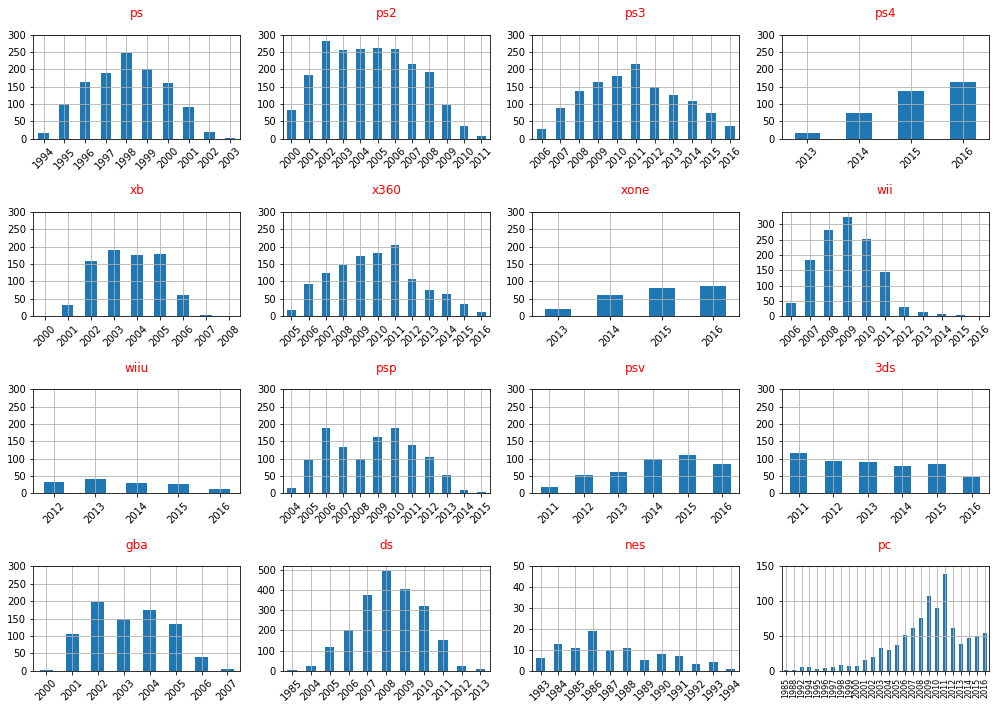

In [21]:
top16 = [ 'ps'  , 'ps2' , 'ps3' , 'ps4',
          'xb'  , 'x360', 'xone', 'wii',         
          'wiiu', 'psp' , 'psv' , '3ds',        
          'gba' , 'ds'  , 'nes' , 'pc' ]

top_platforms = []
for ptf in top16:
    top_platforms.append(df_sell_platform['released_games'].loc[ptf].rename(ptf))

# Start visualization

fig = plt.figure(figsize = (14,10))
        
# Create grid

egrid = (4,4)
ax1  = plt.subplot2grid(egrid, (0, 0), rowspan = 1, colspan = 1)
ax2  = plt.subplot2grid(egrid, (0, 1), rowspan = 1, colspan = 1)
ax3  = plt.subplot2grid(egrid, (0, 2), rowspan = 1, colspan = 1)
ax4  = plt.subplot2grid(egrid, (0, 3), rowspan = 1, colspan = 1)

ax5  = plt.subplot2grid(egrid, (1, 0), rowspan = 1, colspan = 1)
ax6  = plt.subplot2grid(egrid, (1, 1), rowspan = 1, colspan = 1)
ax7  = plt.subplot2grid(egrid, (1, 2), rowspan = 1, colspan = 1)
ax8  = plt.subplot2grid(egrid, (1, 3), rowspan = 1, colspan = 1)

ax9  = plt.subplot2grid(egrid, (2, 0), rowspan = 1, colspan = 1)
ax10 = plt.subplot2grid(egrid, (2, 1), rowspan = 1, colspan = 1)
ax11 = plt.subplot2grid(egrid, (2, 2), rowspan = 1, colspan = 1)
ax12 = plt.subplot2grid(egrid, (2, 3), rowspan = 1, colspan = 1)

ax13 = plt.subplot2grid(egrid, (3, 0), rowspan = 1, colspan = 1)
ax14 = plt.subplot2grid(egrid, (3, 1), rowspan = 1, colspan = 1)
ax15 = plt.subplot2grid(egrid, (3, 2), rowspan = 1, colspan = 1)
ax16 = plt.subplot2grid(egrid, (3, 3), rowspan = 1, colspan = 1)

# Create list with work areas:
ax_list = [ax1 , ax2 , ax3 , ax4 ,
           ax5 , ax6 , ax7 , ax8 ,
           ax9 , ax10, ax11, ax12,
           ax13, ax14, ax15, ax16]



for i in range(len(top16)):
    top_platforms[i].plot(kind = 'bar', ax = ax_list[i])


for i, ax in enumerate(fig.axes):
    # Add plot title
    ax.text(0.5, 1.2, f'{top16[i]}'     ,                
                va = 'center'           , 
                ha = 'center'           , 
                color = 'red'           ,
                fontsize = 12           ,
                transform = ax.transAxes)
    # Grid
    ax.grid(True) 

    ax.set_xlabel('')        
    if i == 15:
        # Add additional setting for x labels
        for label in ax.xaxis.get_ticklabels():
            label.set_color('black')
            label.set_rotation(90)
            label.set_fontsize(8)
    else:
        for label in ax.xaxis.get_ticklabels():
            label.set_color('black')
            label.set_rotation(45)
            label.set_fontsize(10)        
    
    # Add additional setting for y labels:
    if i == 13:
        ax.set_yticks(np.arange(0, 501, 100))
    elif i == 14:
        ax.set_yticks(np.arange(0,  51, 10))        
    elif i == 15:
        ax.set_yticks(np.arange(0,  151, 50))   
    else:
        ax.set_yticks(np.arange(0, 301, 50))
        
# Настройка расстояний между границами созданных subplots
plt.tight_layout()

plt.show()

Вывод: На получившемся графике хорошо видно, что в среднем даже самые успешные игровые платформы живут от 5 до 10 лет.Новые игровые платформы появляются раз в 5 - 7 лет, что также позволяет объяснить продолжительность жизни игровых платформ. Новые игры, более требовательные к производительным ресурсам, а старые платформы уже не могут себе этого позволить. 

В качестве исключения можно обратить свое внимание на игровую платформу *PC*, первые игры на данную платформу начали появляться уже в начале 1980-х, достигнув своего пика к 2011, после чего начался спад. При этом эта платформа по прежнему остается актуальной, о чем свидетельсвует ежегодный выпуск от 35 до 50 игр - ежегодно. Кроме того, данный график, позволяет отметить, что из ТОП10 игровых платформ, только *PC* показывает слабо выраженную положительную динамику роста на конец 2016 года, все остальные платформы из ТОП10 все меньше и меньше интересуют покупателей.

### Актуальные игровые платформы

Вышепредставленные результаты позволяют отметить, что нас будет интересовать временной период с начала 2010 по 2016 год.Поэтому в первую очередь определим игровые платформы, которые были или являются актуальными на данные момент времени.

Actual data: 



released_games  total_sales  mean_sales
platform release_year                                         
3ds      2011                     116        63.20        0.54
         2012                      93        51.36        0.55
         2013                      91        56.57        0.62
         2014                      80        43.76        0.55
         2015                      86        27.78        0.32
...                               ...          ...         ...
x360     2016                      13         1.52        0.12
xone     2013                      19        18.96        1.00
         2014                      61        54.07        0.89
         2015                      80        60.14        0.75
         2016                      87        26.15        0.30

[65 rows x 3 columns]

Actual platforms: 

Index(['3ds', 'ds', 'pc', 'ps2', 'ps3', 'ps4', 'psp', 'psv', 'wii', 'wiiu',
       'x360', 'xone'],
      dtype='object', name='platform')


,3ds,ds,pc,ps2,ps3,ps4,psp,psv,wii,wiiu,x360,xone
release_year,,,,,,,,,,,,
2010,NaN,323.0,90,38.0,181,NaN,188.0,NaN,253,NaN,182,NaN
2011,116.0,153.0,139,7.0,215,NaN,139.0,18.0,143,NaN,206,NaN
2012,93.0,23.0,61,NaN,148,NaN,106.0,53.0,31,32.0,106,NaN
2013,91.0,8.0,38,NaN,126,16.0,54.0,63.0,12,42.0,75,19.0
2014,80.0,NaN,47,NaN,108,75.0,10.0,100.0,6,31.0,63,61.0
2015,86.0,NaN,50,NaN,73,137.0,3.0,110.0,4,28.0,35,80.0
2016,46.0,NaN,54,NaN,38,164.0,NaN,85.0,1,14.0,13,87.0


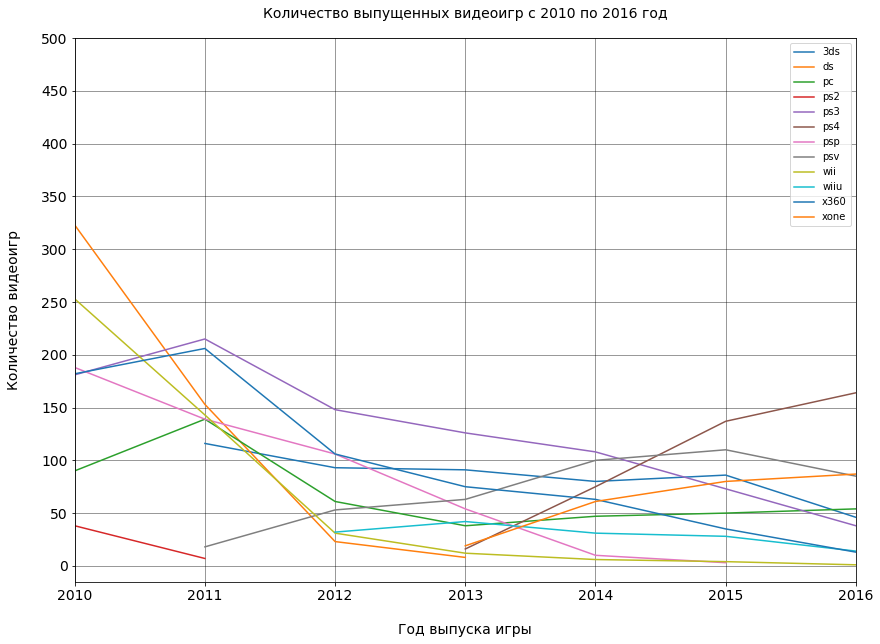

In [22]:
df_actual_platforms = (df_games
                       .query('release_year >= 2010')
                       .groupby(['platform', 'release_year']).agg({'total_sales' : ['count', 'sum', 'mean']})
                      )

df_actual_platforms.columns = ['released_games', 'total_sales', 'mean_sales']
actual_name =  df_actual_platforms.index.get_level_values('platform').unique()

print('Actual data: \n')
display(df_actual_platforms)

print('Actual platforms: \n')
print(actual_name)


act_platforms = []
for ptf in actual_name:
    act_platforms.append(df_actual_platforms['released_games'].loc[ptf].rename(ptf))
    
df_act_platform = pd.concat(act_platforms, axis = 1)
display(df_act_platform)

# Get plot for released_games 
plot2 = plot_data(df_act_platform, 'Количество выпущенных видеоигр с 2010 по 2016 год', 'Количество видеоигр')

,3ds,ds,pc,ps2,ps3,ps4,psp,psv,wii,wiiu,x360,xone
release_year,,,,,,,,,,,,
2010,NaN,85.02,24.28,5.64,142.17,NaN,35.04,NaN,127.95,NaN,170.03,NaN
2011,63.20,26.18,35.03,0.45,156.78,NaN,17.82,4.63,59.65,NaN,143.84,NaN
2012,51.36,11.01,23.22,NaN,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013,56.57,1.54,12.38,NaN,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,NaN,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,NaN,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,NaN,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


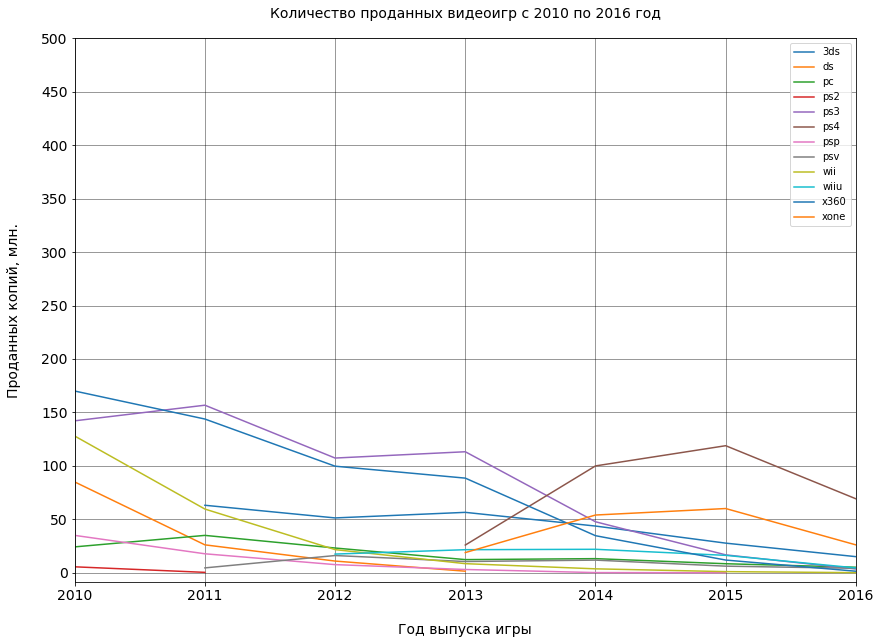

In [23]:
act_platforms = []
for ptf in actual_name:
    act_platforms.append(df_actual_platforms['total_sales'].loc[ptf].rename(ptf))
    
df_act_platform = pd.concat(act_platforms, axis = 1)
display(df_act_platform)

# Get plot for released_games 
plot2 = plot_data(df_act_platform, 'Количество проданных видеоигр с 2010 по 2016 год', 'Проданных копий, млн.')

Вывод: Более детальный анализ данных за период с 2010 по 2016 подтвердил, что в игровой идустрии сейчас наблюдается кризис. Или закономерность, если учесть что многие процессы подчиняются нормальному закону распределения, то можно предположить, что в данный момент компьютерные игры постепенно идут кпрекращению своего существования.

Также анализ данных показывает, что игровые платформы: 
* **DS** - перестала быть актуальной платформой в 2013 году; 
* **PS2** - перестала быть актуальной платформой в 2011 году; 
* **PSP** - перестала быть актуальной платформой в 2016 году;
* **WII** - перестала быть актуальной платформой в 2016 году; 

Игровые платформы, которые потеряют актуальность в ближайшее время:
* **PS3** - активно теряет свою актуальность, в качестве причины можно названть появление нового поколения - **PS4**; 
* **WIIU** - активно теряет свою актуальность;
* **x360** - активно теряет свою актуальность, в качестве причины можно названть появление нового поколения - **XONE**;
* **PC** - по прежнему актуальна, но наблюдается уменьшение объемов продаж;
* **PSV** - игровая платформа, которая скорее всего прошла уже макимальный пик своего развития, но ближайшие несколько лет, игры будут по прежнему выпускаться на данную платформу;

Игровые платформы, которые обладают актуальностью и в ближайшее время будут востребованны:
* **3ds** - oтносительно новая платформа, но имеет явную тенденции на умеьшение количества выпускаемых игр и уменьшение объемов продаж;
* **PS4** - новая платформа, будет актуальной в ближайшее време, но геймеры стали меньше покупать такие игры. На данный момент, имеет лучшую экономическое положение.
* **XONE** - новая платформа, будет актуальной, какое-то время. Также как и **PS4** активно теряет в объемах проданных игр.


### Ящики с усами

In [24]:
df_sell_platform = df_sell_platform.reset_index()
df_sell_platform

,platform,release_year,released_games,total_sales,mean_sales
0,2600,1980,9,11.38,1.26
1,2600,1981,46,35.68,0.78
2,2600,1982,36,28.88,0.80
3,2600,1983,11,5.84,0.53
4,2600,1984,1,0.27,0.27
...,...,...,...,...,...
233,xb,2008,1,0.18,0.18
234,xone,2013,19,18.96,1.00
235,xone,2014,61,54.07,0.89
236,xone,2015,80,60.14,0.75


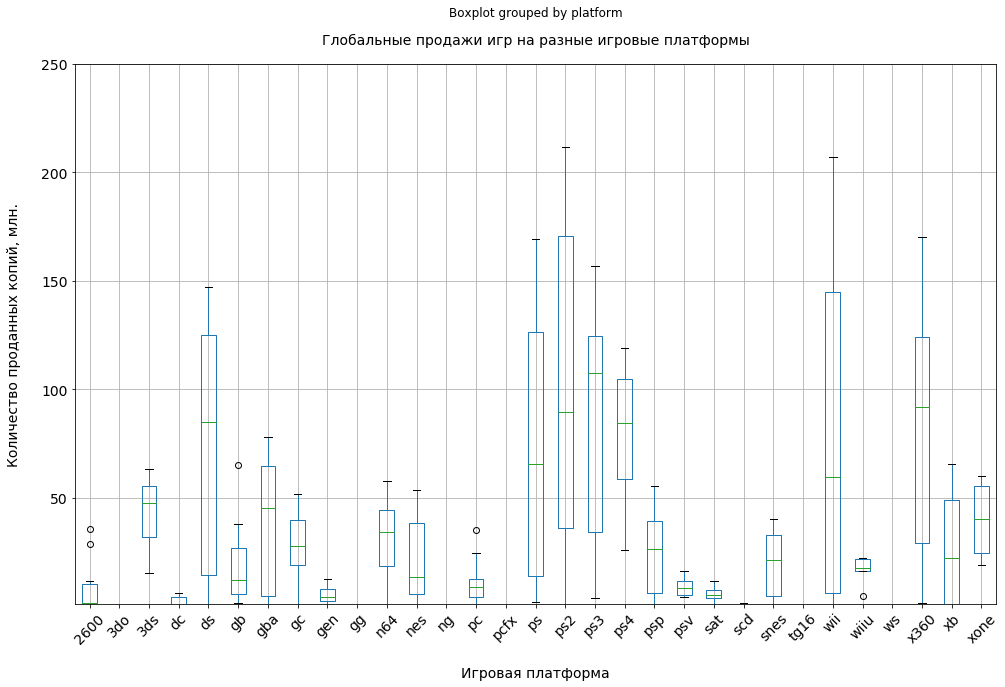

In [25]:
df_sell_platform.boxplot(column = ['total_sales'], 
                         by = 'platform'         , 
                         figsize = (16,10)       , 
                         fontsize = 14           ,
                         rot = 45                );
plt.ylim(1, 250)

# Set labels
plt.title('Глобальные продажи игр на разные игровые платформы', fontsize = 14, pad = 20 )

# Set y label
plt.ylabel('Количество проданных копий, млн.', color = 'black', fontsize = 14, labelpad = 20)

plt.xlabel('Игровая платформа', color = 'black', fontsize = 14, labelpad = 20);

Вывод: Игровые платформы серии **PS, PS2, PS3, PS4** являются самыми востребованными платформами. Именно на эти игровые платформы приходится наибольшее количество проданных игр. Отдельно стоит отметить, что больше всего игр было выпущено для игровой платформы **PS2**, при этом наиболее преспективным направлением (наибольшее медианное значение) являлась игровая платформа **PS3**, но она просуществовала, значительно меньше чем **PS2**.

Кроме того, второе место в иерархии игровых платформ занимает серия платформ **X360, XB, XONE**

### Влияние критики

Для данного исследования, я выберу несколько игровых платформ: 
* **PS2**
* **PS3**
* **PS4**

In [26]:
def correlation_visual(df, platform):
    # Get data only for actual platform
    df_platform = (df
                     .query('platform == @platform')
                     .loc[:, 'na_sales':'total_sales']
                  )
    
    # Calculate correlation
    df_corr = df_platform.corr()
    
    # Start visualization

    fig = plt.figure(figsize = (14,10))
        
    # Create grid
    egrid = (2,4)
    ax1 = plt.subplot2grid(egrid, (0,0), colspan = 4)
    ax2 = plt.subplot2grid(egrid, (1,0), colspan = 4)
    
    # Get info for the first ax1 area
    ax1.plot(df_corr.index, df_corr['total_sales'], label = platform, color = 'blue' , linestyle = '-', 
                                                    marker='o', markerfacecolor='red', markersize=12 )
    # legend
    ax1.legend(loc = 'upper left', frameon = False) 
    # Grid
    ax1.grid(True , which = 'major', color = 'k', linestyle = 'solid', alpha = 0.5)

    for label in ax1.xaxis.get_ticklabels():
        label.set_color('black')
        label.set_rotation(15)
        label.set_fontsize(12)
    for label in ax1.yaxis.get_ticklabels():
        label.set_color('black')
        label.set_rotation(0)
        label.set_fontsize(14)
    
    # Settings for ax2
    ax2 = sns.heatmap(df_corr, annot = True)
   
    plt.show()
    
    return df_platform, df_corr

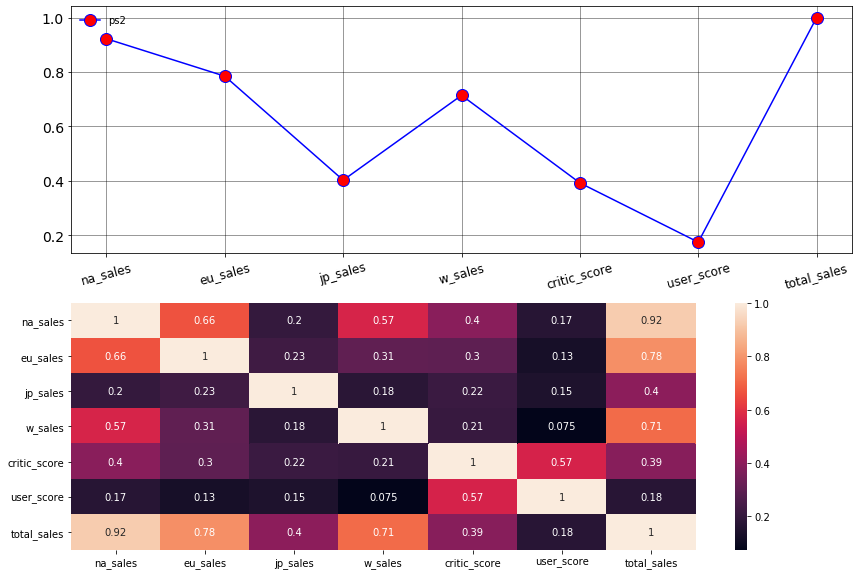

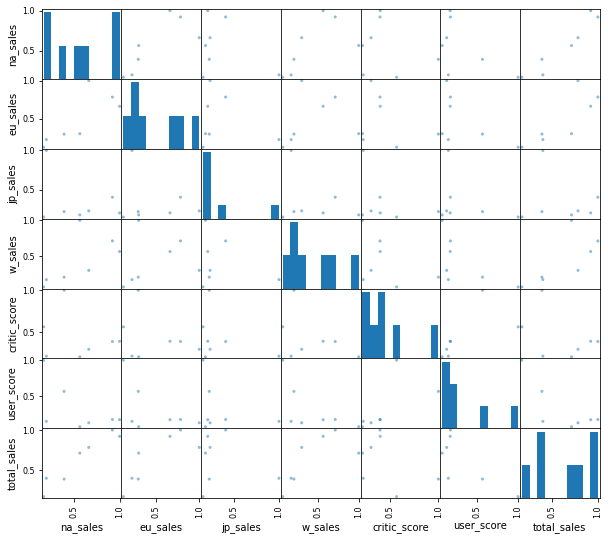

In [27]:
# Get data (correlation)
df_ps2, df_ps2_corr = correlation_visual(df_games, "ps2")
# Get scatter plot
pd.plotting.scatter_matrix(df_ps2_corr, figsize=(10,9));

Вывод: Следует отметить, что на объемы продаж игр для платформы **PS2** отзывы критиков и игроков, безусловно оказывают некторое влияние, но их влияние весьма скромно.Наибольшее влияние критика игровых экспертов и игроков, оказывает на рынки японии и остального мира, в то время как рынки Америки и Европы, в большей степени зависят от чего-то еще, возможно рекламы. Частично это можно объяснить тем, что большинство игр в первую очередь выходят в Америке и Европе, после чего они становятся доступными в Азии и других частях света. Поэтому игроки при покупке игры, возможно читают отзывы. Американские и европейские игроки, в определенной степени являются первооткрывателями. Коэффициент корреляции суммарных продаж с отзывами критиков равняется 0.39, а с отзывами игроков 0.18. 
 
Кроме того, влияние отзывов критиков и пользователей на игровую платформу **PS2** могло быть снижено, поскольку игровая платформа довольно старая и основные отзывы публиковались в журналах, а не в интернете. Посмотрим изменилось ли что-то с внедрение интернета в нашу повседневность.

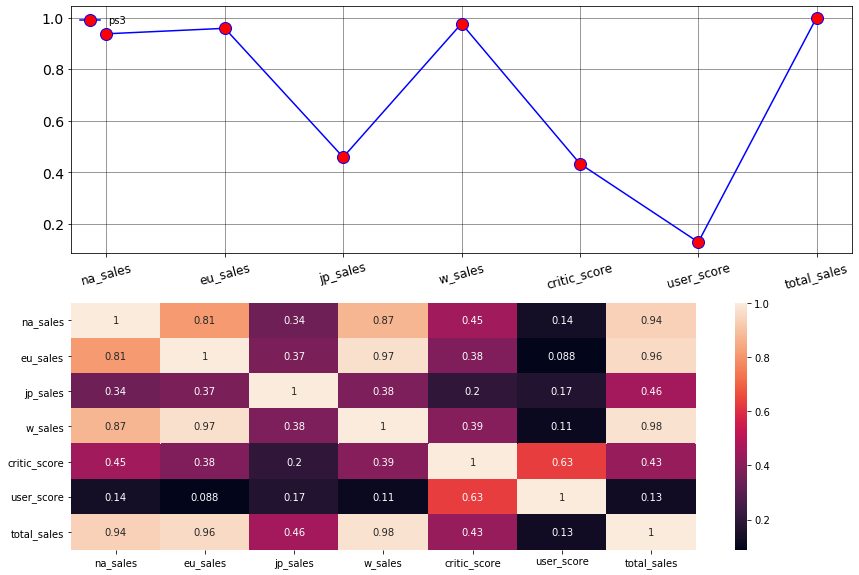

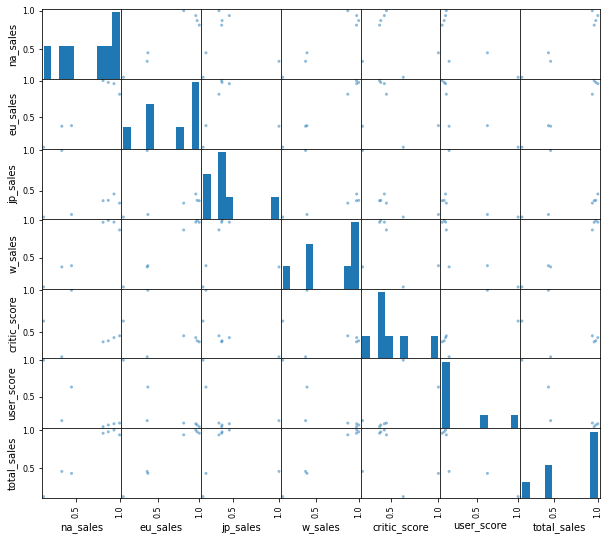

In [28]:
# Get data (correlation)
df_ps3, df_ps3_corr = correlation_visual(df_games, "ps3")
# Get scatter plot
pd.plotting.scatter_matrix(df_ps3_corr, figsize=(10,9));

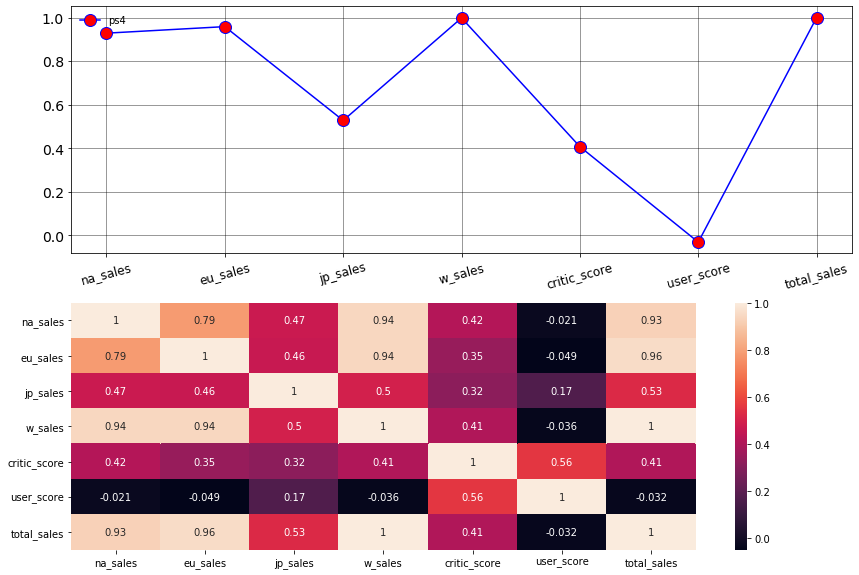

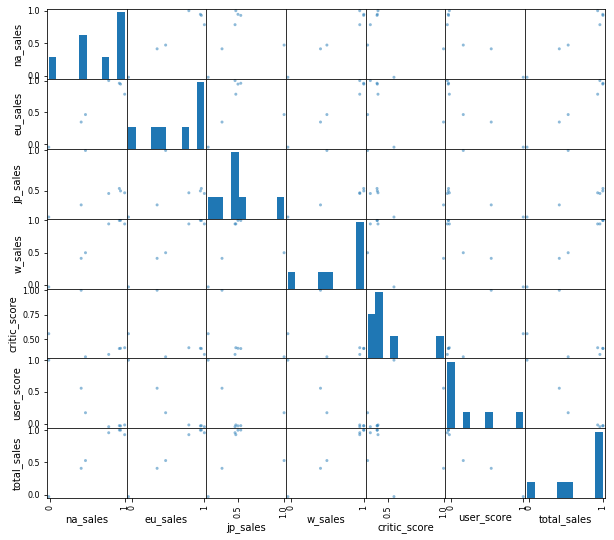

In [29]:
# Get data (correlation)
df_ps4, df_ps4_corr = correlation_visual(df_games, "ps4")
# Get scatter plot
pd.plotting.scatter_matrix(df_ps4_corr, figsize=(10,9));

Вывод: С приходом интернета в нашу жизнь, рост влияния критики на успешные продажи игр не увеличился, а в случае платформы  **PS4** даже уменьшился. Поэтому можно сказать, что рейтинг игроков, не смутит желающего купить ту или иную игру. Отдельно стоит отметить, что на количество продаж игр для игровые платформы **PS3**, **PS4** теперь оказываю влияние, как Американский, так и Европейский рынок. Отдельно отмечу, что было бы интересно посмотреть на роль рекламы на успешность продаж компьютерных игр.

### Топ жанры - актуальные

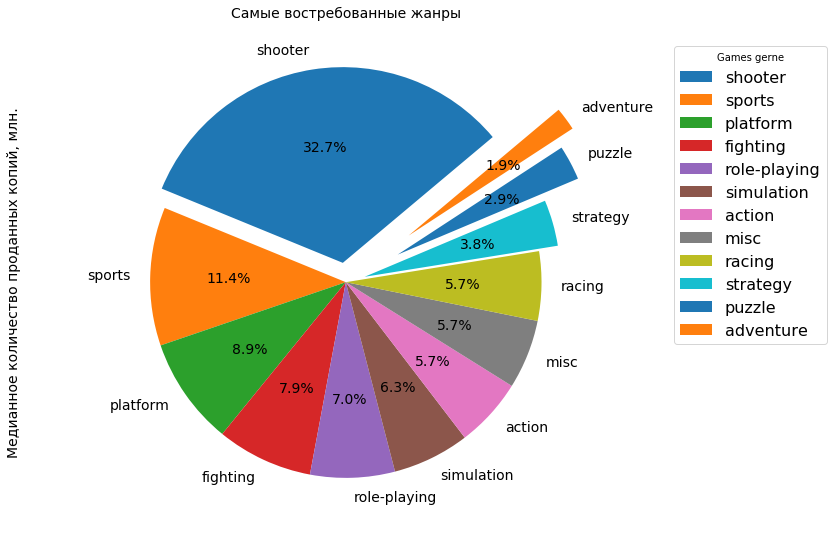

In [30]:
df_genre = (df_games
                    .query('release_year >= 2014')
                    .groupby(['genre']).agg({'total_sales' : ['count', 'median']})
           )

# Rename columns
df_genre.columns = ['released_games', 'median_sales']

top_gerne = df_genre.sort_values('median_sales', ascending = False)
#display(top_gerne)

# Visualization
explode = (0.1, 0.0, 0.0, 0.0,  0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.3, 0.4)

top_gerne['median_sales'].plot(kind     = 'pie'    ,
                               figsize  = (10, 9)  ,
                               fontsize = 14       , 
                               autopct  = '%1.1f%%', 
                               explode  = explode  ,
                               shadow   = False    ,
                               startangle = 40     );

# Set labels
plt.title('Самые востребованные жанры', fontsize = 14, pad = 20 )
plt.ylabel('Медианное количество проданных копий, млн.', color = 'black', fontsize = 14, labelpad = 80);

# Set legend
plt.legend(title = 'Games gerne'          ,
           bbox_to_anchor = (1, 0, 0.5, 1),
           prop = {'size': 16}            );




Отдельно стоит рассмотреть количество выпущенных игр, где можно заметить несколько любопытных моментов

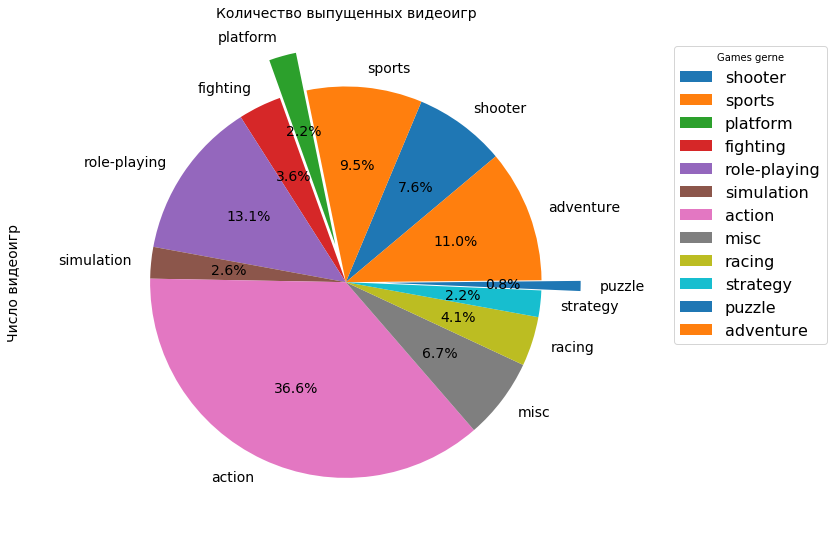

In [31]:
# Visualization 2
explode = (0.0, 0.0, 0.2, 0.0,  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0)

top_gerne['released_games'].plot(kind     = 'pie' , 
                              figsize  =(10,9)    ,
                              fontsize = 14       , 
                              autopct  = '%1.1f%%', 
                              explode  = explode  ,
                              shadow   = False    ,
                              startangle = 40     );

# Set labels
plt.title('Количество выпущенных видеоигр', fontsize = 14, pad = 20 )
plt.ylabel('Число видеоигр', color = 'black', fontsize = 14, labelpad = 80);

# Set legend
plt.legend(title = 'Games gerne'          ,
           bbox_to_anchor = (1, 0, 0.5, 1),
           prop = {'size': 16}            );

**Вывод по разделу:**

Наиболее востребованными игровыми жанрами являются:
* **Shooter**
* **Sport**
* **Platform**
* **Fighting**
* **Role-Playing**

На долю этих 5 игровых жанров приходится, почти 70% всех проданных игр. Хуже всего продаются игры из жанра: 
* **Strategy**
* **Adventure**
* **Simulation**. 


Дополнительный анализ данных с привлечением информации о количестве выпущенных игра по жанрам подтвердил, что:
1. Производители выпускаю такую продукцию, которая больше интересует покупателей. 
2. Любопытным является, то факт что производители игр активно выпускают игры из жанра **Adventure**, но эти игры очень плохо окупаются.

## Портрет актуального пользователя 

In [32]:
def portret_sales(df, param, region):
    df_result = (df
                   .query('release_year >= 2014')
                   .groupby([param]).agg({region : ['sum']})
                )

    # Rename column
    df_result.columns = ['total_sales']

    # Get share for sales
    df_result['sales_share'] = df_result['total_sales'] / sum(df_result['total_sales'])

    top_5 = df_result.sort_values('total_sales', ascending = False).head(5)
    return top_5

### Америка 

In [33]:
top_platform_na = portret_sales(df_games, 'platform', 'na_sales')
top_gerne_na    = portret_sales(df_games, 'genre'   , 'na_sales')

print('Портрет современного американского пользователя: Платформа \n')
display(top_platform_na)
print('\n')

print('Портрет современного американского пользователя: Жанр \n')
display(top_gerne_na)

Портрет современного американского пользователя: Платформа 



,total_sales,sales_share
platform,,
ps4,98.61,0.35
xone,81.27,0.29
x360,28.30,0.10
3ds,22.64,0.08
ps3,22.05,0.08




Портрет современного американского пользователя: Жанр 



,total_sales,sales_share
genre,,
shooter,79.02,0.28
action,72.53,0.26
sports,46.13,0.16
role-playing,33.47,0.12
misc,15.05,0.05


Вывод: Портрет современного американского покупателя выглядит примерно так - счастливый обладатель одной из пяти современных платформ **ps4**, **xone**, **x360**, **3ds**, **ps3** предпочитающий игры из жанров **shooter**, **action**, **sports**, **role-playing** или **misc**.

### Европа

In [34]:
top_platform_eu = portret_sales(df_games, 'platform', 'eu_sales')
top_gerne_eu    = portret_sales(df_games, 'genre'   , 'eu_sales')

print('Портрет современного европейского пользователя: Платформа \n')
display(top_platform_eu)
print('\n')

print('Портрет современного европейского пользователя: Жанр \n')
display(top_gerne_eu)

Портрет современного европейского пользователя: Платформа 



,total_sales,sales_share
platform,,
ps4,130.04,0.48
xone,46.25,0.17
ps3,25.54,0.09
pc,17.97,0.07
3ds,16.12,0.06




Портрет современного европейского пользователя: Жанр 



,total_sales,sales_share
genre,,
action,74.68,0.28
shooter,65.52,0.24
sports,45.73,0.17
role-playing,28.17,0.10
racing,14.13,0.05


Вывод: Портрет современного европейского покупателя выглядит примерно так - счастливый обладатель одной из пяти современных платформ **ps4**, **xone**, **ps3**, **pc**, **3ds** предпочитающий игры из жанров **action**, **shooter**, **sports**, **role-playing** или **racing**.

### Япония

In [35]:
top_platform_jp = portret_sales(df_games, 'platform', 'jp_sales')
top_gerne_jp    = portret_sales(df_games, 'genre'   , 'jp_sales')

print('Портрет современного азиатского пользователя: Платформа \n')
display(top_platform_jp)
print('\n')

print('Портрет современного азиатского пользователя: Жанр \n')
display(top_gerne_jp)

Портрет современного азиатского пользователя: Платформа 



,total_sales,sales_share
platform,,
3ds,44.24,0.48
ps4,15.02,0.16
psv,14.54,0.16
ps3,11.22,0.12
wiiu,7.31,0.08




Портрет современного азиатского пользователя: Жанр 



,total_sales,sales_share
genre,,
role-playing,31.16,0.33
action,29.58,0.32
fighting,6.37,0.07
misc,5.61,0.06
shooter,4.87,0.05


Вывод: Портрет современного азиатский покупателя выглядит примерно так - счастливый обладатель одной из пяти современных платформ **3ds**, **ps4**, **psv**, **ps3**, **wiiu** предпочитающий игры из жанров **role-playing**, **action**, **fighting**, **misc** или **shooter**.

### Влияние возврастного рейтинга

In [36]:
esrb_na = portret_sales(df_games, 'rating', 'na_sales')
print('Влияние возврастного рейтинга на современного американского покупателя \n')
display(esrb_na)
print('\n')

esrb_eu = portret_sales(df_games, 'rating', 'eu_sales')
print('Влияние возврастного рейтинга на современного европейского покупателя \n')
display(esrb_eu)
print('\n')

esrb_jp = portret_sales(df_games, 'rating', 'jp_sales')
print('Влияние возврастного рейтинга на современного азиатского покупателя \n')
display(esrb_jp)
print('\n')

Влияние возврастного рейтинга на современного американского покупателя 



,total_sales,sales_share
rating,,
m,96.42,0.44
e,50.74,0.23
t,38.95,0.18
e10+,33.23,0.15




Влияние возврастного рейтинга на современного европейского покупателя 



,total_sales,sales_share
rating,,
m,93.44,0.44
e,58.06,0.27
t,34.07,0.16
e10+,26.16,0.12




Влияние возврастного рейтинга на современного азиатского покупателя 



,total_sales,sales_share
rating,,
t,14.78,0.41
e,8.94,0.25
m,8.01,0.22
e10+,4.46,0.12


**Вывод по разделу:** В то время, как европейский и америнские рынки игровых платформ выгляд примерно одинаковы: 
* используются игровые платформы **ps4** или **xone**, на долю доля продаж которых приходится практически 60% от числа всех проданных игр;
* предпочитают жанры **shooter**, **action**, **sports**, на долю доля продаж которых приходится практически 70% от числа всех жанров проданных игр;
* пользуются наибольшим спросом игры с возрастной категорией: **M** - Для взрослых и **E** — «Для всех»

отдельно стоит выделить рынок Японии. В частности большинство японцов:
* используют игровые платформы: **3ds** или **ps4**, **psv** , на долю доля продаж которых приходится практически 80% от числа всех проданных игр;
* предпочитают жанры **role-playing**, **action**, **fighting**, на долю доля продаж которых приходится практически 75% от числа всех жанров проданных игр;
* пользуются наибольшим спросом игры с возрастной категорией: **T** - Подросткам и **E** — «Для всех»


На основании чего можно предположить, что в Японии компьютерными играми больше увлекаются подрости, в то время как взрослые японцы, предпочитают проводить свой досуг другим образом.

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Исчерпывающей характеристикой любой случайной величины является ее функция распределения (интегральная или дифференциальная). Но основные свойства СВ (хотя и не все) могут быть описаны более компактно с помощью нескольких числовых характеристик (параметров распределения). Поэтому найдем наиболее важную числовую характеристику - центр распределения. 

Существует, по крайней мере, три параметра, характеризующих положение центра распределения (или короче - три характеристики положения): мода, медиана и математическое ожидание, но моду, пока не будем считать. 

математическое ожидание выборки = среднему выборки

Прежде, чем приступить к проверке гипотез нужно подготовить данные для анализа:
1. Извлечь из общего числа платформ, данные только для интересующих нас;
2. Поскольку в данных были пропуски, а их я никак не исправлял, значит их нужно исключить.
3. Рассчитать значение математического ожидания для того чтобы сформулировать гипотезы.

In [37]:
df_pc = df_games.query('release_year >= 2014 and (platform == "pc" & user_score != "nan")')
                
user_score_pc = df_pc['user_score'].values


df_xone = df_games.query('release_year >= 2014 and (platform == "xone" & user_score != "nan")')
                
user_score_xone = df_xone['user_score'].values

print('PC mean score:', np.mean(user_score_pc), '\nXBOX ONE mean score:', np.mean(user_score_xone))

PC mean score: 6.298360655737705 
XBOX ONE mean score: 6.594545454545456


Сформулируем статистическую гипотезу. 

**Нулевая гипотеза:** средний пользовательский рейтинг платформы Xbox One за период с 2014 по 2016 год, равен среднему пользовательскому рейтингу платформы PC ($H_{0}$, что $m_{x_{\ xone}} = 7.06$)

**Альтернативная гипотеза:** средний пользовательский рейтинг платформы Xbox One за период с 2014 по 2016 год отличается от среднего рейтинга платформы PC ($H_{1}$, что $m_{x_{\ xone}} \neq 7.06$)


Для проверки гипотезы использую использую специальный тест - критерий Стьюдента (t-критерий), который базируется на использовании статистики Стьюдента. В частности нам нужно проверить гипотезу о равенстве средних двух выборок. 

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, примените `метод` scipy.stats.ttest_ind (array1, array2, equal_var).

In [38]:
alpha = 0.05  # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(user_score_pc, user_score_xone)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


Вывод:</font> Гипотеза о равенстве средних двух выборок при уровне значимости 2а = 10% не опровергается и следовательно, предположение о том, что средние пользовательские рейтинги платформ Xbox One и PC за период с 2014 по 2016 год явлеются одинкаковыми -  верно.

### Средние пользовательские рейтинги жанров Action и Sports разные

In [39]:
df_action = df_games.query('release_year >= 2014 and (genre == "action" & user_score != "nan")')
                
user_score_act = df_action['user_score'].values


df_sport = df_games.query('release_year >= 2014 and (genre == "sports" & user_score != "nan")')
                
user_score_sport = df_sport['user_score'].values

print('Action mean score:', np.mean(user_score_act), '\nSport mean score:', np.mean(user_score_sport))

Action mean score: 6.760606060606061 
Sport mean score: 5.2251968503937


Сформулируем статистическую гипотезу. 

**Нулевая гипотеза:** средний пользовательский рейтинг жанра Sport за период с 2014 по 2016 год, равен среднему пользовательскому рейтингу жанра Action ($H_{0}$, что $m_{x_{\ sport}} = 6.76$)

**Альтернативная гипотеза:** средний пользовательский рейтинг жанра Sport за период с 2014 по 2016 год отличается от среднего рейтинга жанра Action ($H_{1}$, что $m_{x_{\ sport}} \neq 6.76$)

Для проверки гипотезы использую использую специальный тест - критерий Стьюдента (t-критерий), который базируется на использовании статистики Стьюдента. В частности нам нужно проверить гипотезу о равенстве средних двух выборок. 

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, примените `метод` scipy.stats.ttest_ind (array1, array2, equal_var).

In [40]:
alpha = 0.05  # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(user_score_act, user_score_sport)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


Вывод:</font> Гипотеза о равенстве средних двух выборок при уровне значимости 2а = 10% опровергается и следовательно, предположение о том, что cредние пользовательские рейтинги жанров **Action** и **Sports** разные является верным.

# Общий вывод

На основе выполненного анализа данных, становится ясно, что индустрия игр для различных платформ в настоящее время находится в кризисном состоянии, о чем свидетельствуют тренды направленные на уменьшение суммарных продаж игр, для различных игровых платформ.  

В настояшее время на рынке представлено несколько актуальных игровых платформ: **3ds**, **PS4**, **XONE**. Причем, в зависимости от рынка преобладает та или иная платформа: США - **PS4**, Европа - **PS4**, Азия - **3ds**.

Игры для этих платформ будут пользоватся спросом в 2017 году, кроме того неследует забывать и о пользователях таких игровых платформ, как **PS3**, **WIIU**, **x360**, **PC** и **PSV**. Данные платформы (за исключением **PC**) с каждым годом теряют в продажах и количество выпускаемых игр для этих платформ сокращается, но при это по прежнему сохраняются пользователи, которые не могут позволить себе купить более новые (**3ds**, **PS4**, **XONE**) игровые платформы, поэтому просто отказаться от таких клиентов будет экономически не выгодно. Доля таких покупателей составляет до 20% в зависимости от региона.


Наиболее востребованными игровыми жанрами являются **Platform**, **Sport**, **Shooter**, **Role-Playing** и **Fighting** на долю этих 5 игровых жанров приходится, почти 70% всех проданных игр. Хуже всего продаются игры из жанра **Strategy**, **Adventure** и **Puzzle**.



*В качестве рекомендаций на 2017 год для Российского рынка, я бы отметил:*
1. Сосредоточить внимание на игровых платформах **PS4** и **XONE**. Я бы исключил из этого списка **3ds**, потому что данная платформа наиболее актуальна в Японии, а в Европе и США представлена слабо.
2. Иметь в небольшом количестве игры для платформ **PS3**, **WIIU**, **x360**, **PC** и **PSV**. При этом игры для **PS3**, **x360**, **PC** будут пользоваться большим спросом чем **WIIU** и **PSV**. Особенно важным иметь в налии игры на **PC**, в какой-то степени Российский рынок похож на Европейский,  а там пользователи **PC** составляют 7%.
3. В больше массе игры должны быть представлены, следующими жанрами: **Fighint**, **Sport**, **Shooter**, **Role-Playing** и **Platform**. Также хорошо было бы иметь в небольшом количестве игры из жанров **Racing** и **Action**.
4. В возврастном категории лучше всего пользуются игры **M** - Для взрослых и **E** — «Для всех»;
5. Глобальная рекомендация. Следует начать поиск более преспективного направления для продаж. Игры теряют свою актуальность.